___

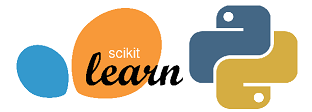
___
# Regresión logística con Python

Para esta clase, trabajaremos con el [Conjunto de datos Titanic desde Kaggle](https://www.kaggle.com/c/titanic). Este es un conjunto de datos muy famoso y muy a menudo es el primer paso de un estudiante en el aprendizaje automático.

Intentaremos predecir una clasificación: supervivencia o fallecimiento.
Comencemos nuestra comprensión de la implementación de la regresión logística en Python para la clasificación.

Usaremos una versión "semi-limpia" del conjunto de datos del Titanic. Si usas el conjunto de datos alojado directamente en Kaggle, es posible que debas hacer una limpieza adicional que no se muestra en esta clase.


## Importar Librerias
¡Vamos a importar algunas bibliotecas para empezar!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Los Datos

Comencemos leyendo el archivo titanic_train.csv en un dataframe de pandas.

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Análisis exploratorio de datos

¡Comencemos con un análisis de datos exploratorio! ¡Comenzaremos revisando los datos que faltan!

## Datos faltantes

¡Podemos usar seaborn para crear un mapa de calor simple para ver dónde faltan datos!

<AxesSubplot:>

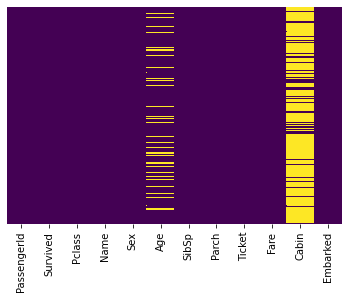

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Falta aproximadamente el 20 por ciento de los datos de Edad. La proporción de edad que falta es probablemente lo suficientemente pequeña como para reemplazarla razonablemente con alguna forma de imputación. Mirando la columna Cabina, parece que simplemente nos faltan demasiados datos para hacer algo útil en un nivel básico. Probablemente eliminaremos esto más tarde o lo cambiaremos a otra función como "Cabina conocida: 1 o 0".

¡Continuemos visualizando algunos datos más!

<AxesSubplot:xlabel='Survived', ylabel='count'>

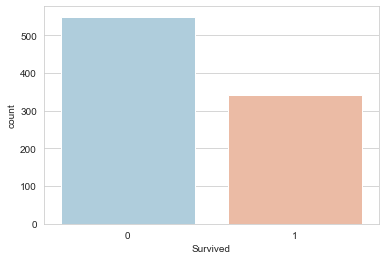

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

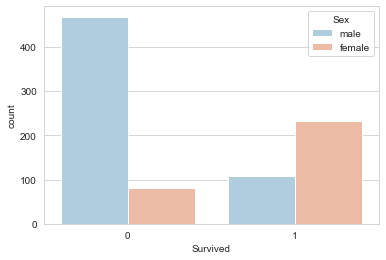

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

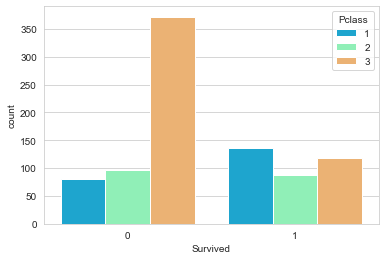

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

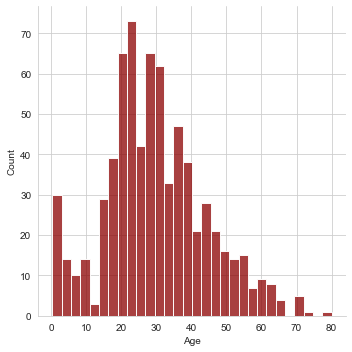

In [10]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:>

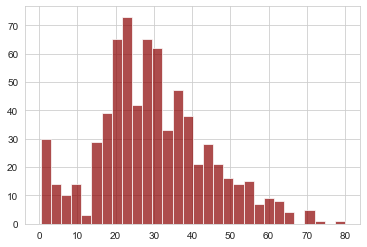

In [11]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

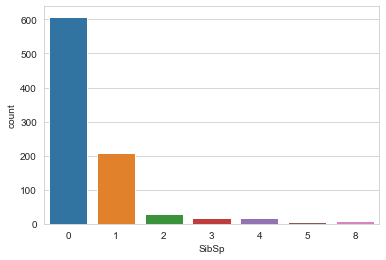

In [12]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

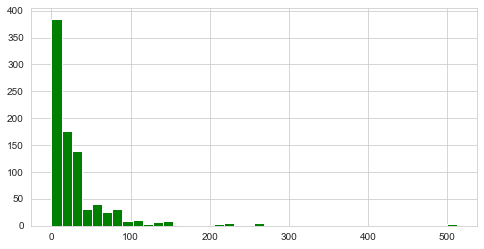

In [13]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

____
### Utilizamos el módulo Cufflinks para graficar
___
 ¡Tomemos un momento para mostrar un ejemplo de cufflinks!

In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Limpiando los datos
Queremos completar los datos de edad que faltan en lugar de simplemente eliminar las filas de datos de edad que faltan. Una forma de hacerlo es completando la edad media de todos los pasajeros (imputación).
Sin embargo, podemos ser más inteligentes al respecto y verificar la edad promedio por clase de pasajero. Por ejemplo:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

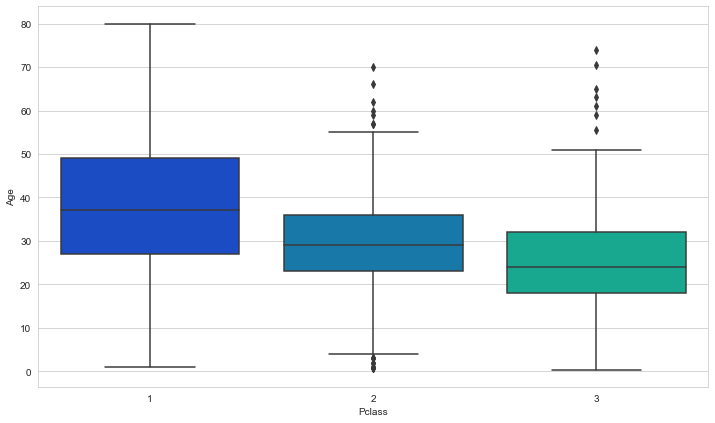

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Podemos ver que los pasajeros más ricos de las clases más altas tienden a ser mayores, lo cual tiene sentido. Usaremos estos valores de edad promedio para imputar según Pclass por Edad.

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

¡Ahora apliquemos esta función!

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

¡Ahora revisemos ese mapa de calor nuevamente!

<AxesSubplot:>

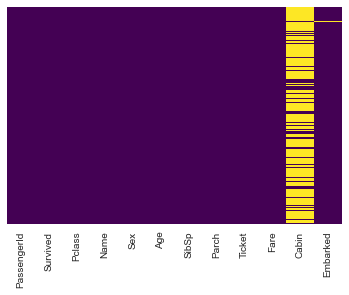

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

¡Bien! Sigamos adelante y eliminemos la columna Cabina (Cabin) y las filas cuando Embarcado (Embarked) sea igual a NaN.

In [20]:
train.drop('Cabin',axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train.dropna(inplace=True)

## Conversión de características categóricas

¡Necesitaremos convertir características categóricas en variables ficticias usando pandas! De lo contrario, nuestro algoritmo de aprendizaje automático no podrá tomar directamente esas características como entradas.

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
# Creamos variables ficticias para las caracteristicas "Sex" y "Embarked"
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [25]:
#Eliminamos todas las variables no numericas
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
#Adicionamos las variables ficticias creadas a nuestro dataframe
train = pd.concat([train,sex,embark],axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


¡Bien! ¡Nuestros datos están listos para nuestro modelo!

# Construyendo un modelo de regresión logística

Comencemos por dividir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba (hay otro archivo test.csv con el que puede probar en caso de que quiera usar todos estos datos para el entrenamiento).

## Dividir dataset en Entrenamiento(Train) y Prueba(Test)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Entrenamiento y predicción

In [38]:
from sklearn.linear_model import LogisticRegression


In [40]:
# Se utiliza el paraametro solver (Algoritmo a utilizar en el problema de optimización) y 
# max_iter (Número máximo de iteraciones requeridos para que el solver o algoritmo logre un resultado)
# Documentacion: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

logmodel = LogisticRegression(solver='lbfgs', max_iter=1000) #Parametros utilizados para problemas con multiclases
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [41]:
predictions = logmodel.predict(X_test)

¡Pasemos a evaluar nuestro modelo!

## Evaluación

¡Podemos verificar la precisión, el recall y f1-score utilizando el reporte de clasificación!

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



**Precision** es la proporción de predicciones de esa clase que son verdaderas. Entonces, el 82% de las predicciones son verdaderas para la clase 0 predicha (fallecio) y 84% de las predicciones son verdaderas para la clase 1 predicha (sobrevivio)

**Recall** es la proporción de verdaderos positivos que se identifican como tales. Esto significa que su modelo está identificando correctamente el 91% de la clase 0, pero solo el 68% de la clase 1.

**F1-score** solo es útil si Precision y Recall son similares.

**support** El soporte es el número de apariciones reales de la clase en el conjunto de datos especificado, es decir, el número de muestras con la respuesta verdadera que se encuentran en esa clase. 

## Buen trabajo!